In [1]:
#
import pandas as pd
import numpy as np
#
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
#
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge
#
import warnings
warnings.filterwarnings("ignore")

/Users/saishruthi.tn@ibm.com/anaconda3/envs/cp/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Regression analysis

* Dataset from : https://www.kaggle.com/purbar/advertising-data
* Source : http://www-bcf.usc.edu/~gareth/ISL/data.html

In [2]:
input_data = pd.read_csv("data/Advertising.csv")

In [3]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### No null values!! We are good to go.

In [4]:
input_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### No encodings needed....

# Separate predictors and target

In [5]:
predictors = input_data.drop(['Unnamed: 0', 'Sales', 'Radio', 'Newspaper'], axis=1)

In [6]:
predictors.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
target = input_data[['Sales']]

In [8]:
target.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


# Model 1: Simple linear Regresssion

In [9]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size= 0.2, random_state = 42)

In [10]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('Intercept value is : ', reg.intercept_)
print("The linear regression co-efficient is", reg.coef_)
pred = reg.predict(x_test)

Intercept value is :  [7.11963843]
The linear regression co-efficient is [[0.04652973]]


In [11]:
print("Mean Square error", metrics.mean_squared_error(y_test, pred))
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, pred))
rmse1 = round(rmse1, 2)
print("Root mean square error",rmse1)
print("R2 Score", metrics.r2_score(y_test, pred))

Mean Square error 10.204654118800956
Root mean square error 3.19
R2 Score 0.6766954295627077


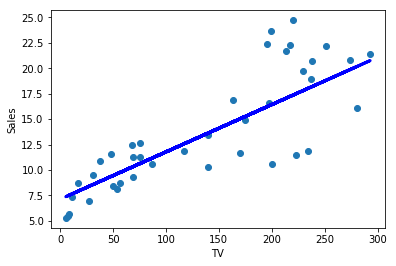

In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test, pred, color='blue', linewidth = 3)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

# Model 1.1 : Multiple Linear Regression

In [13]:
predictors = input_data.drop(['Unnamed: 0', 'Sales', 'Radio'], axis=1)
target = input_data[['Sales']]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size= 0.2, random_state = 42)

In [15]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('Intercept value is : ', reg.intercept_)
print("The linear regression co-efficient is", reg.coef_)
pred = reg.predict(x_test)

Intercept value is :  [5.47864518]
The linear regression co-efficient is [[0.04627186 0.05609097]]


In [16]:
print("Mean Square error", metrics.mean_squared_error(y_test, pred))
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, pred))
rmse1 = round(rmse1, 2)
print("Root mean square error",rmse1)
print("R2 Score", metrics.r2_score(y_test, pred))

Mean Square error 11.062557300662819
Root mean square error 3.33
R2 Score 0.6495152805385851


### Visualizing the training data with hyperplane

Text(0.5, 0, 'Sales')

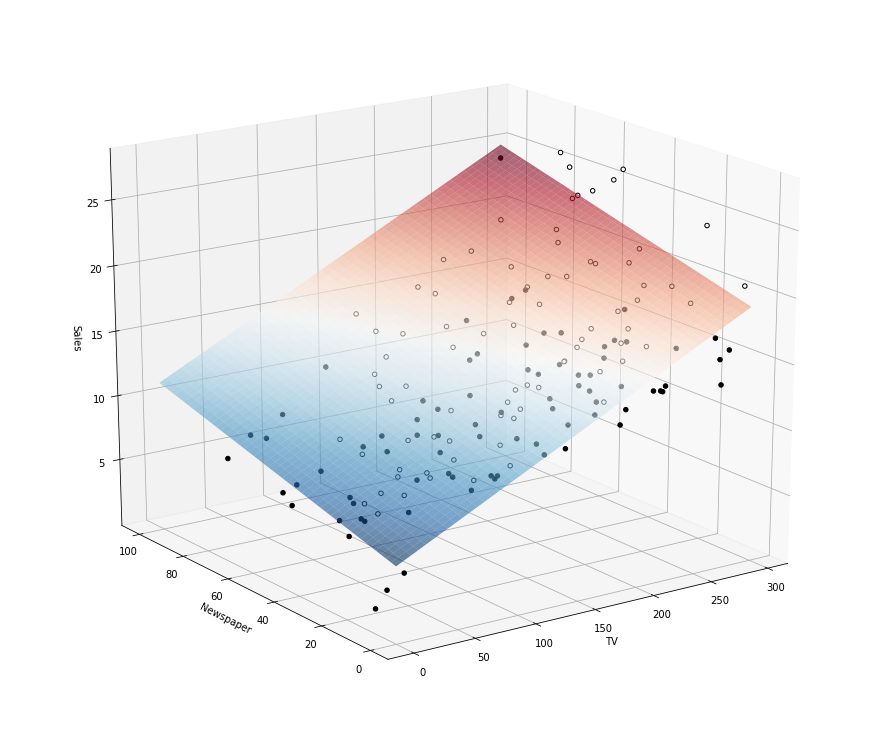

In [17]:

#Create grid for plotting
xx1, xx2 = np.meshgrid(np.linspace(x_train.TV.min(), x_train.TV.max(), 100), 
                       np.linspace(x_train.Newspaper.min(), x_train.Newspaper.max(), 100))

plane = reg.intercept_ + reg.coef_[0][0] * xx1 + reg.coef_[0][1] * xx2
fig = plt.figure(figsize=(12, 10))
#plot configure
ax = Axes3D(fig, azim=-125, elev=20)
# plot hyperplane
surf = ax.plot_surface(xx1, xx2, plane, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
resid = y_train - reg.predict(x_train)
# 
data_res = x_train.copy(deep=True)
#get residual value for plotting the hyperplane
data_res['residue'] = resid
# Residue whose value is >= 0 will be plotted  above the plane. e.g: actual = 50 and predicted is 40 giving 
#residue as 10.
# Residue whose value is < 0 will be plotted  below the plane. e.g: actual = 50 and predicted is 60 giving 
#residue as -10.
ax.scatter(data_res.loc[data_res['residue'] >= 0, 'TV'], data_res.loc[data_res['residue'] >= 0, 'Newspaper'], y_train.loc[data_res['residue'] >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(data_res.loc[data_res['residue'] < 0, 'TV'], data_res.loc[data_res['residue'] < 0, 'Newspaper'], y_train.loc[data_res['residue'] < 0], color='black', alpha=1.0)
# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Sales')

Reference: https://stackoverflow.com/questions/30336138/how-to-plot-a-multivariate-function-in-python

# Model 2: Ridge Regression

In [18]:
ridge = Ridge(alpha = 10)
ridge.fit(x_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
prediction =ridge.predict(x_test)

In [20]:
print("Mean Square error", metrics.mean_squared_error(y_test, prediction))
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, prediction))
rmse1 = round(rmse1, 2)
print("Root mean square error",rmse1)
print("R2 Score", metrics.r2_score(y_test, prediction))

Mean Square error 11.06210029343643
Root mean square error 3.33
R2 Score 0.6495297594737155


# Visualize change in co-efficients

In [21]:
alphas = np.logspace(-15,15,20000)

In [22]:
coefs = [] 
for a in alphas: 
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False) 
    ridge.fit(x_train, y_train) 
    coefs.append(ridge.coef_) 

In [23]:
inp_b = np.vstack(coefs) 

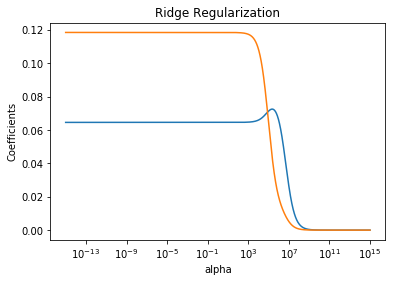

In [24]:
ax = plt.gca()
ax.plot(alphas, inp_b)
ax.set_xscale('log')
plt.xlabel('alpha') 
plt.ylabel('Coefficients') 
plt.title('Ridge Regularization') 
plt.axis('tight') 
plt.show() 

# Search parameters Ridge regression

In [25]:
from sklearn.grid_search import GridSearchCV

y_train_arr = np.ravel(y_train.Sales)

param_test1 = {
 'alpha': [5, 67, 1111, 999000]
}

gsearch1 = GridSearchCV(estimator =linear_model.Ridge(alpha=5), 
 param_grid = param_test1, scoring='mean_absolute_error',n_jobs=4,iid=False, cv=5)

#
gsearch1.fit(x_train,y_train_arr)
#
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -2.49518, std: 0.40975, params: {'alpha': 5},
  mean: -2.49497, std: 0.40973, params: {'alpha': 67},
  mean: -2.49152, std: 0.40950, params: {'alpha': 1111},
  mean: -3.24217, std: 0.37821, params: {'alpha': 999000}],
 {'alpha': 1111},
 -2.491519417572887)